In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
from matplotlib.patches import Rectangle

In [2]:
def no_axes(ax):
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.patch.set_alpha(0)

## Extraction at single points ("moorings") is still very slow for both methods, using xarray or using CDFTOOLS/NCO

In [3]:
moorx = [540, 820, 960, 650, 1040, 840, 870, 1200, 660, 540, 1080, 1070]
moory = [1530, 1250, 1150, 1220, 1320, 1540, 1660, 1000, 1550, 1620, 1460, 1400]
moorn = ["001", "002", "003", "004", "005", "006", "007", "008", "009", "WAL", "WLS", "WSZ"]

In [4]:
CONFS = ["CREG12.L75-REF08", "CREG12.L75-FUT08"]
years = {}
years[CONFS[0]] = [y for y in range(1996, 2016)]
years[CONFS[1]] = [y for y in range(2060, 2071)]

In [45]:
REFpath = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-moorings"
REF = {}
for i in range(0, 12):
    REF["moor" + str(i+1)] = xr.open_mfdataset(sorted(glob(REFpath + "/*REF*y1996-2015_moor" + moorn[i] + "_I" + str(moorx[i]) + "J" + str(moory[i]) + "*.nc")), 
                                               compat="override", coords="minimal")

In [46]:
FUTpath = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-moorings"
FUT = {}
for i in range(0, 12):
    FUT["moor" + str(i+1)] = xr.open_mfdataset(sorted(glob(FUTpath + "/*FUT*y2051-2070_moor" + moorn[i] + "_I" + str(moorx[i]) + "J" + str(moory[i]) + "*.nc")), 
                                               compat="override", coords="minimal")

In [10]:
titles = ["Mooring 1\nCanada Basin (int)",
          "Mooring 2\nNorth Pole (int/ridge)",
          "Mooring 3\nEurasian Basin (int)",
          "Mooring 4\nN of CAA (slope)",
          "Mooring 5\nN of Kara Sea (slope)",
          "Mooring 6\nN of East Siberian Sea (slope)",
          "Mooring 7\nEast Siberian Sea (shelf)",
          "Mooring 8\nBarents Sea (shelf)",
          "Mooring 9\nNorthwind Ridge (ridge)",
          "Mooring AL (Wang)\nAlaskan Current (slope)",
          "Mooring LS (Wang)\nN of Laptev Sea (slope)",
          "Mooring SZ (Wang)\nN of Severnaya Zemlya (slope)"]

/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.ven

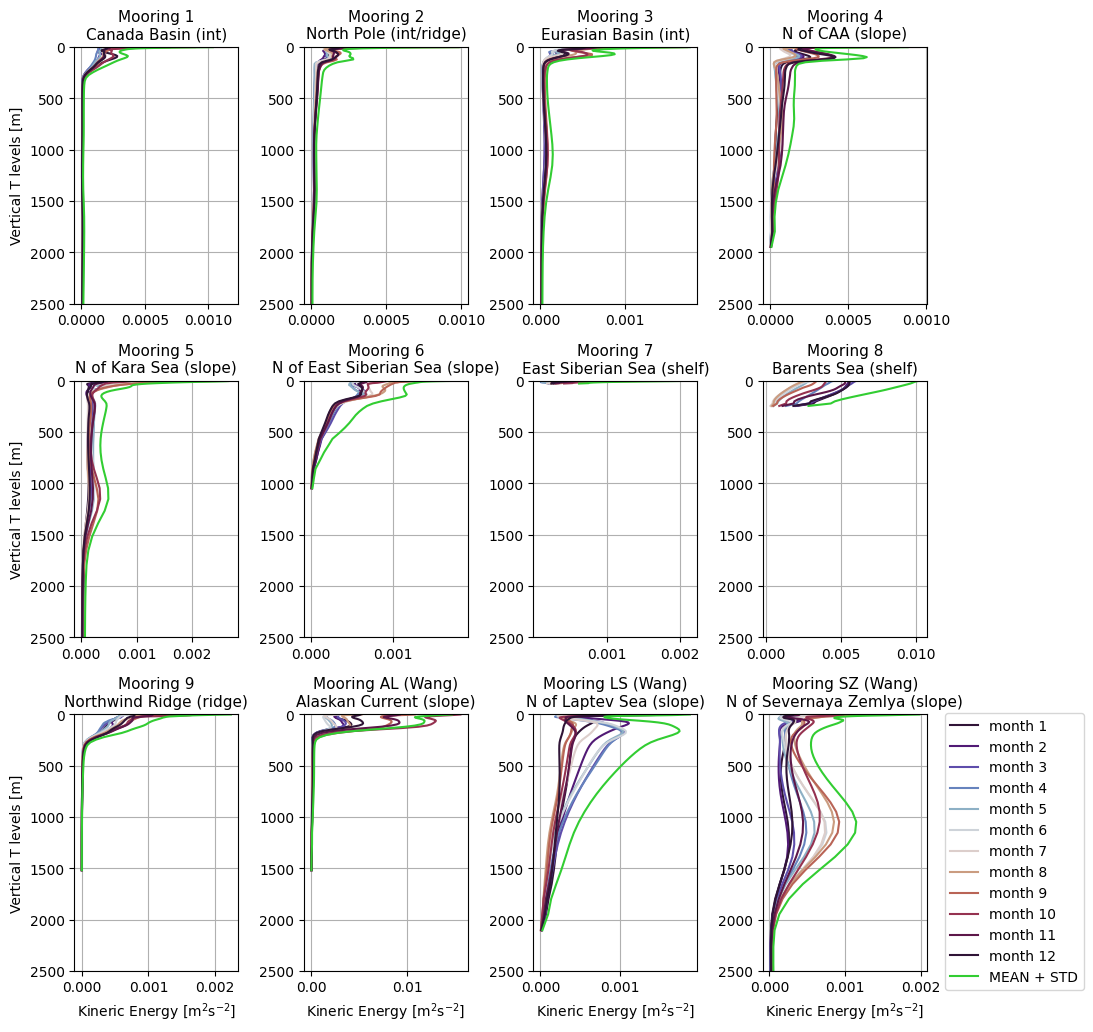

In [11]:
n = 12
REF_colors = plt.cm.twilight_shifted(np.linspace(0, 1, n))
max_depth = 60

fig, ax = plt.subplots(3, 4, figsize=(11, 12))
                 
for i in range(0, 12):    
    for m in range(0, 12):
        REF["moor" + str(i+1)].voke.groupby("time_counter.month").mean("time_counter").isel(deptht=slice(0, max_depth), month=m).plot(
            y="deptht", yincrease=False, color=REF_colors[m], label="month " + str(m+1), ax=ax[int(i/4), np.mod(i, 4)])
    (REF["moor" + str(i+1)].voke.mean("time_counter") 
     + REF["moor" + str(i+1)].voke.std("time_counter")).isel(deptht=slice(0, max_depth)).plot(y="deptht", yincrease=False, 
                                                             label="MEAN + STD", color="limegreen", ax=ax[int(i/4), np.mod(i, 4)])
    ax[int(i/4), np.mod(i, 4)].set_title(titles[i], fontsize=11)

for a in ax[0:2, :].flatten():
    a.set_xlabel("")
for a in ax[2, :].flatten():
    a.set_xlabel("Kineric Energy [m$^2$s$^{-2}$]")
for a in ax[:, 1:4].flatten():
    a.set_ylabel("")
for a in ax[:, :].flatten():
    a.grid()
    a.set_ylim(2500, 0)

plt.legend(loc=4, bbox_to_anchor=(2., -0.1))
plt.subplots_adjust(hspace=0.3, wspace=0.4)

#plt.savefig("../figures/CREG12.L75_KE_REF08_1996-2015_moorings_monthly_climatology.png", dpi=300)

/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.venv/py3_x/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/rieck/.ven

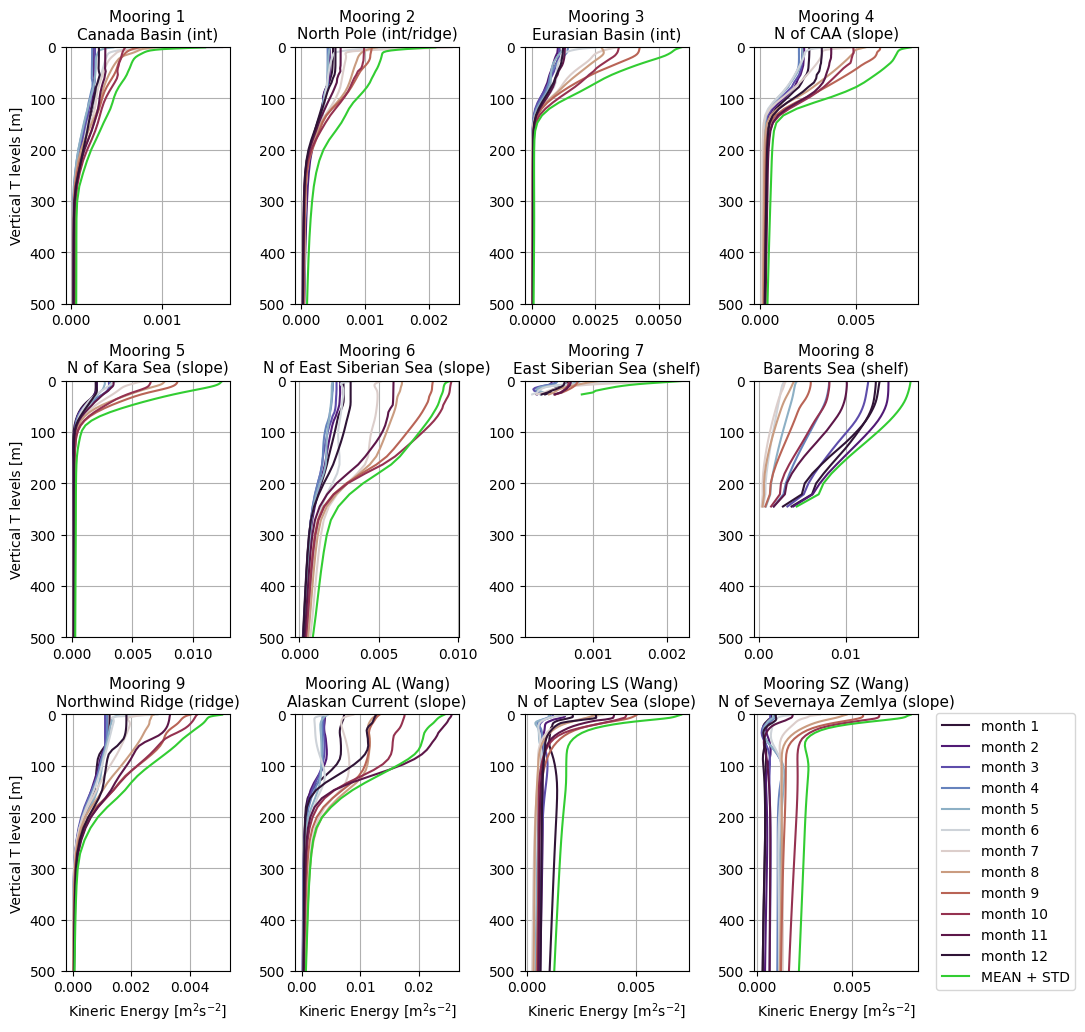

In [12]:
n = 12
FUT_colors = plt.cm.twilight_shifted(np.linspace(0, 1, n))
max_depth = 40

fig, ax = plt.subplots(3, 4, figsize=(11, 12))
                 
for i in range(0, 12):    
    for m in range(0, 12):
        FUT["moor" + str(i+1)].voke.groupby("time_counter.month").mean("time_counter").isel(deptht=slice(0, max_depth), month=m).plot(
            y="deptht", yincrease=False, color=FUT_colors[m], label="month " + str(m+1), ax=ax[int(i/4), np.mod(i, 4)])
    (FUT["moor" + str(i+1)].voke.mean("time_counter") 
     + FUT["moor" + str(i+1)].voke.std("time_counter")).isel(deptht=slice(0, max_depth)).plot(y="deptht", yincrease=False, 
                                                             label="MEAN + STD", color="limegreen", ax=ax[int(i/4), np.mod(i, 4)])
    ax[int(i/4), np.mod(i, 4)].set_title(titles[i], fontsize=11)

for a in ax[0:2, :].flatten():
    a.set_xlabel("")
for a in ax[2, :].flatten():
    a.set_xlabel("Kineric Energy [m$^2$s$^{-2}$]")
for a in ax[:, 1:4].flatten():
    a.set_ylabel("")
for a in ax[:, :].flatten():
    a.grid()
    a.set_ylim(500, 0)

plt.legend(loc=4, bbox_to_anchor=(2., -0.1))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
#plt.savefig("../figures/CREG12.L75_KE_FUT08_2051-2070_moorings_monthly_climatology.png", dpi=300)

In [69]:
def plot_panels(title, moor, var, mins, maxs, titles, cols, colsm, max_depth, months):
    fig, axes = plt.subplots(2, 4, figsize=(10, 11))
    for i in range(0, 6):#7):
        moorp = moor
        k = 0
        ax = axes[int(i / 4), np.mod(i, 4)]
        if var[i] == "ice":
            for m in [2, 8]:
                ax.add_patch(Rectangle((0, m-2), 
                                       REF[moor].siconc.groupby("time_counter.month").mean("time_counter").isel(month=m).values[0][0], 
                                       REF[moor].sithic.groupby("time_counter.month").mean("time_counter").isel(month=m).values[0][0],
                                       facecolor=colsm[k], edgecolor=None))
                ax.add_patch(Rectangle((0, m-2), 
                                       FUT[moor].siconc.groupby("time_counter.month").mean("time_counter").isel(month=m).values[0][0], 
                                       FUT[moor].sithic.groupby("time_counter.month").mean("time_counter").isel(month=m).values[0][0],
                                       facecolor= cols[k], edgecolor=None, hatch="|"))
                k += 1
            ax.set_ylim(0, 12)
            ax.set_xlim(0, 1)
            ax.set_title(titles[i])
            ax.set_yticks(np.arange(0, 12, 3))
            ax.set_yticklabels([0, 3, 0, 3])
            ax.set_ylabel("thickness [m]")
            ax.hlines(6, 0, 1, color="k", lw=1)
        else:
            for m in months:
                REF[moorp][var[i]].groupby("time_counter.month").mean("time_counter").isel(deptht=slice(0, max_depth), month=m).plot(
                        y="deptht", yincrease=False, color=cols[k], ax=ax, label="REF " + months[m])
                ax.hlines(REF[moor].mldr10_1.groupby("time_counter.month").mean("time_counter").isel(month=m), mins[i], maxs[i], color=colsm[k], lw=1)     
                FUT[moorp][var[i]].groupby("time_counter.month").mean("time_counter").isel(deptht=slice(0, max_depth), month=m).plot(
                        y="deptht", yincrease=False, color=cols[k], ax=ax, linestyle="--", label="FUT " + months[m])
                ax.hlines(FUT[moor].mldr10_1.groupby("time_counter.month").mean("time_counter").isel(month=m), mins[i], maxs[i], color=colsm[k], ls="--", lw=1)
                k += 1
            ax.set_title(titles[i])
            ax.grid()
            if np.mod(i, 3) == 0:
                ax.set_ylabel("depth [m]")
            else:
                ax.set_ylabel("")
                ax.set_yticklabels("")
        ax.set_xlim(mins[i], maxs[i])
        ax.set_xlabel(xs[i])
    axes[0, 0].legend(bbox_to_anchor=(3.5, -0.12), ncols=4)
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.85)
    fig.text(0.5, 0.9, title, ha="center", va="bottom", fontsize=16)
    no_axes(axes[1, 3])

- Interior locations: Canada Basin (1) and North Pole (2) are very similar -> we keep Canada Basin (1) and Eurasian Basin (3)  
- Shelf locations: only have two -> keep both for now East Siberian Sea (7) and Barents Sea (8)  
- Slope locations: WSZ is very interesting with the deep reaching maximum, N of CAA could be interesting (LAst ice area), Alaskan Current for some regional variation and  Laptev Sea. Additionaly, WSZ, WSL and WAL can be compared to Wang et al -> we keep (4), (WAL)/(10), (WSL)/(11), (WSZ)/(12)

In [72]:
max_depth = 40

months = {}
months[2] = "march"
months[8] = "sept."

cols = ["steelblue", "firebrick"]
colsm = ["lightsteelblue", "rosybrown"]

var = ["votemper", "vosaline", "vobn2", "ice", "vomke", "voeke", "vovshear"]
subtitles = ["Temperature", "Salinity", "N$^{2}$", "Sea Ice", "MKE", "EKE", "dudz"]
xs = [r"$^{\circ}$C", "", "s$^{-1}$", "concentration", r"m$^{2}$ $s^{-2}$", r"m$^{2}$ $s^{-2}$", "s$^{-1}$"]

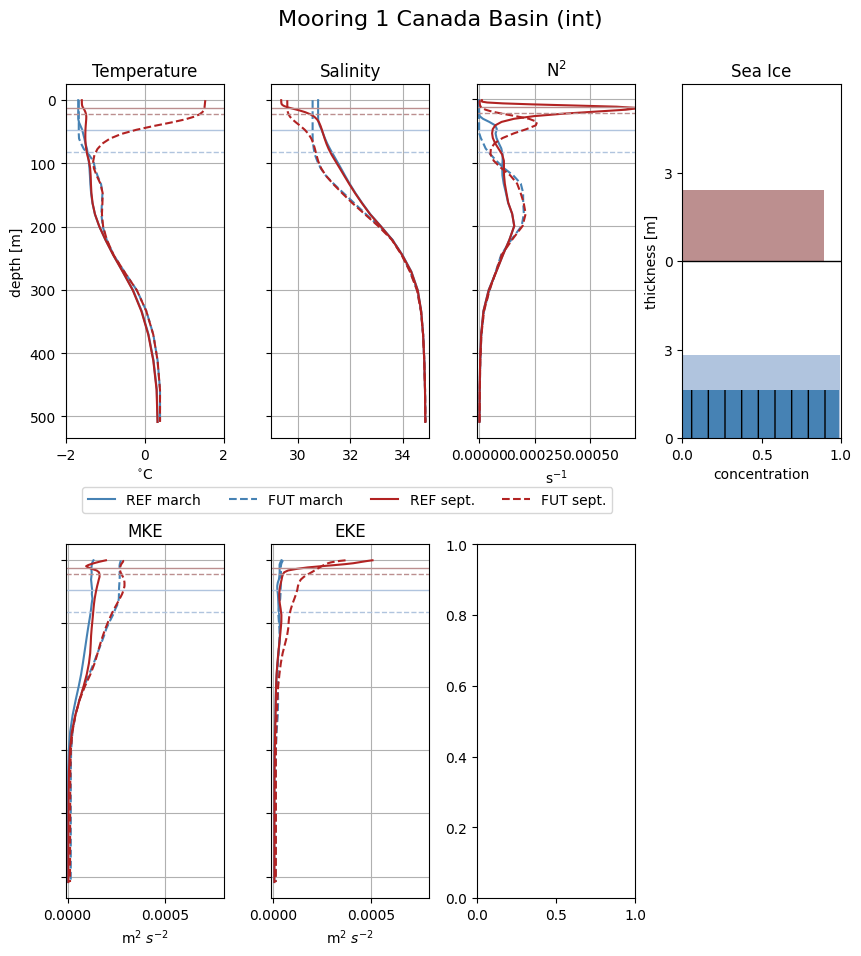

In [78]:
mins = [-2, 29, -1e-5, 0, -1e-5, -1e-5, -1e-6]
maxs = [2, 35, 7e-4, 1, 8e-4, 8e-4, 2e-5]

moor = "moor1"
title = titles[0].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring001.png", dpi=300)

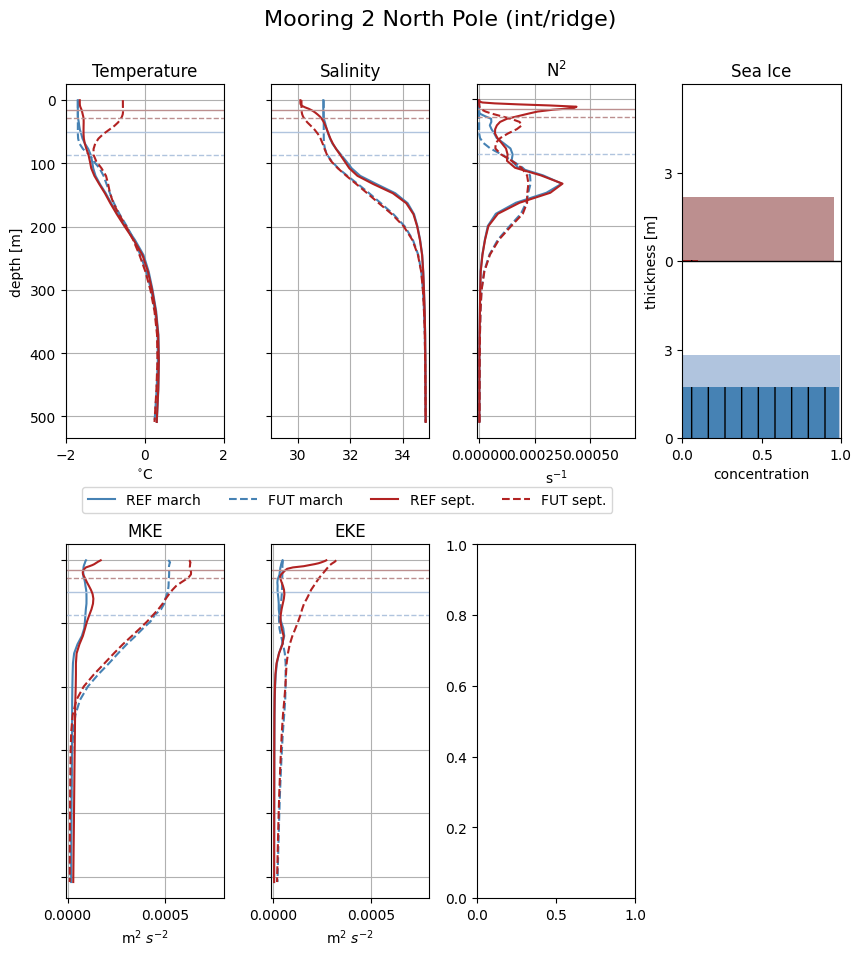

In [79]:
mins = [-2, 29, -1e-5, 0, -1e-5, -1e-5]
maxs = [2, 35, 7e-4, 1, 8e-4, 8e-4]

moor = "moor2"
title = titles[1].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring002.png", dpi=300)

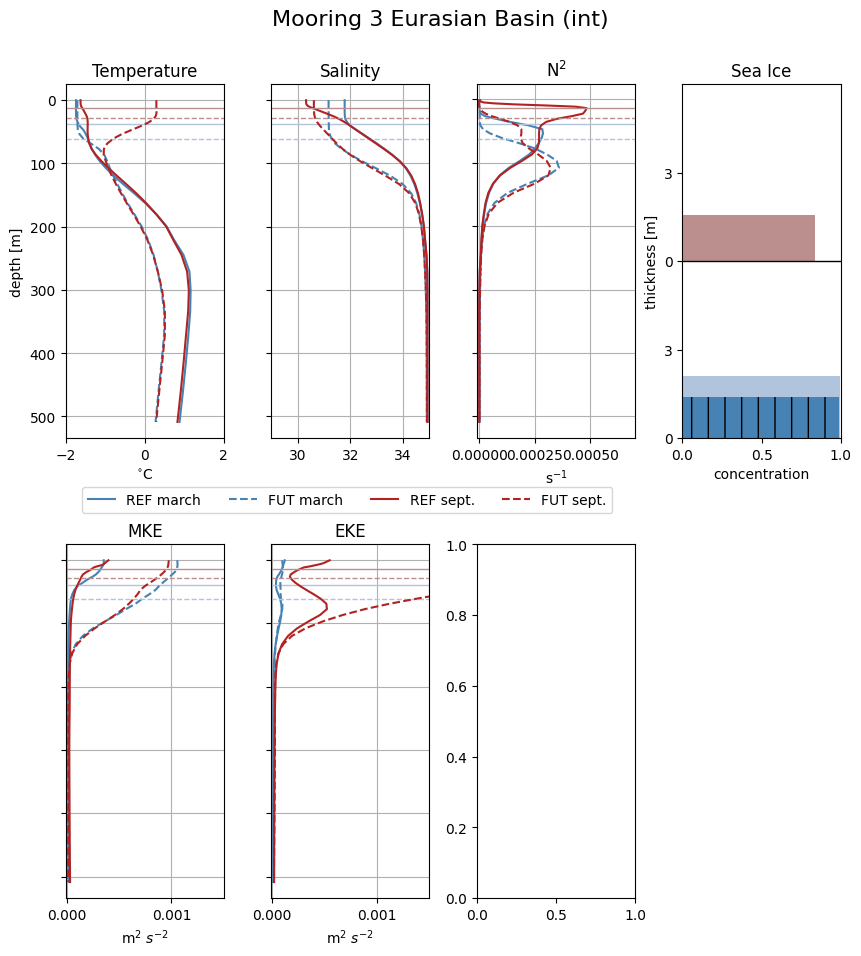

In [80]:
mins = [-2, 29, -1e-5, 0, -1e-5, -1e-5]
maxs = [2, 35, 7e-4, 1, 1.5e-3, 1.5e-3]

moor = "moor3"
title = titles[2].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring003.png", dpi=300)

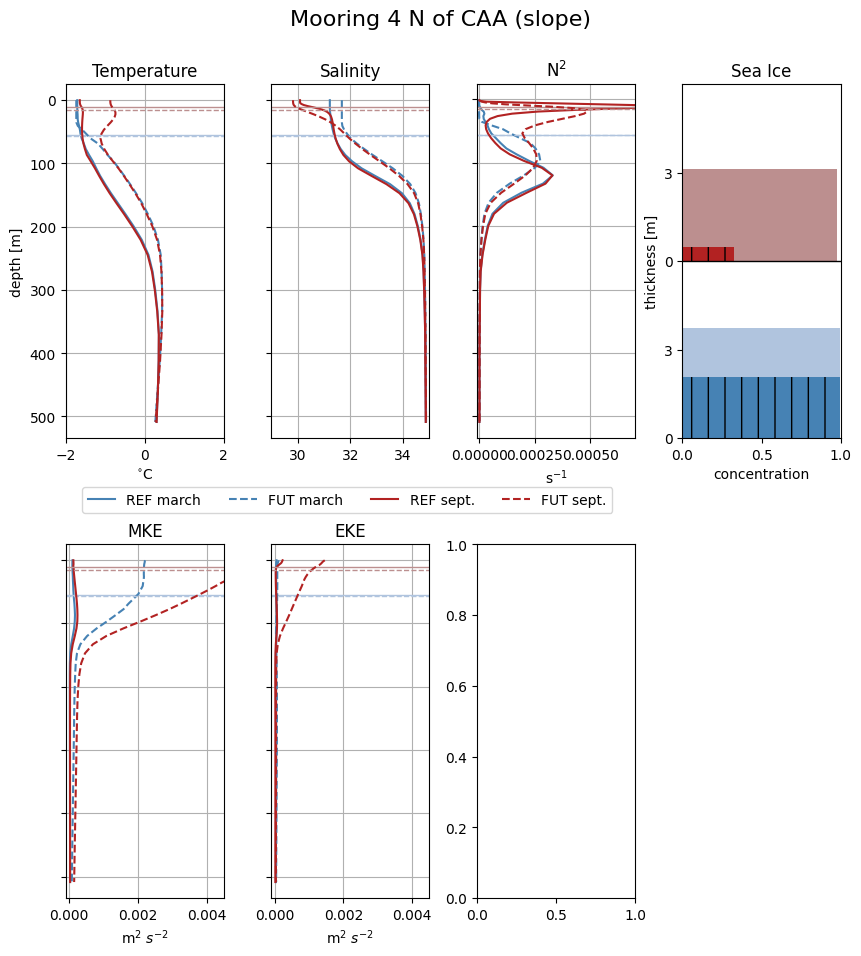

In [81]:
mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 4.5e-3, 4.5e-3]

moor = "moor4"
title = titles[3].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring004.png", dpi=300)

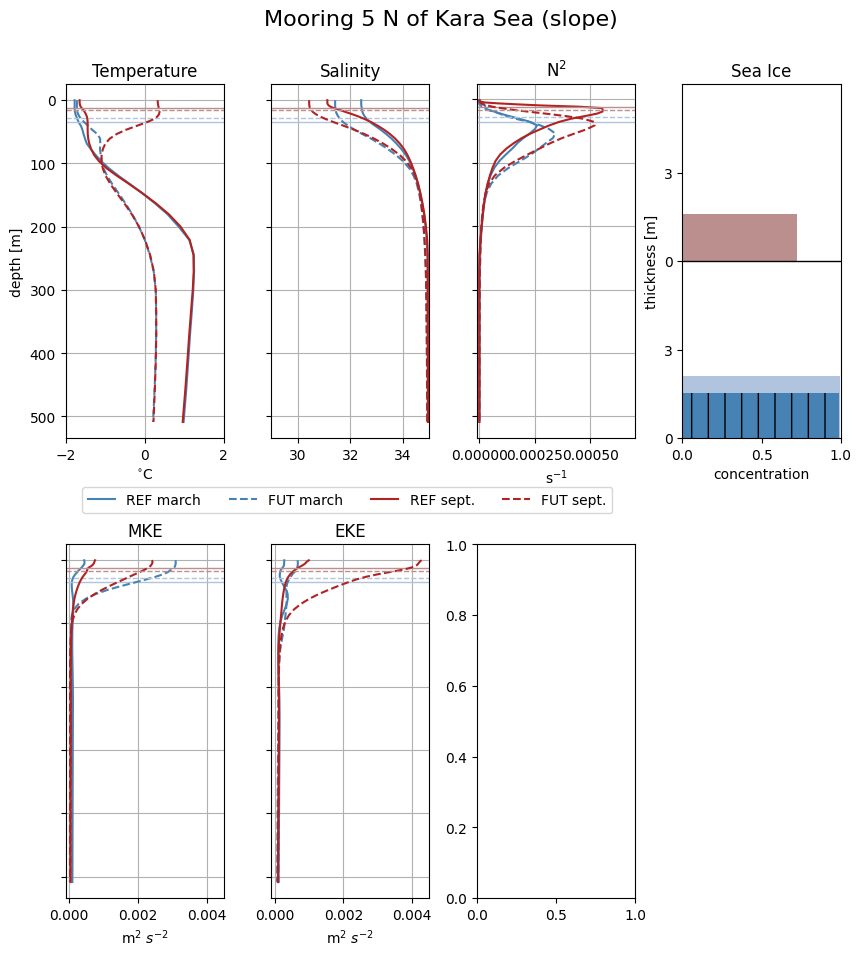

In [82]:
mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 4.5e-3, 4.5e-3]

moor = "moor5"
title = titles[4].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring005.png", dpi=300)

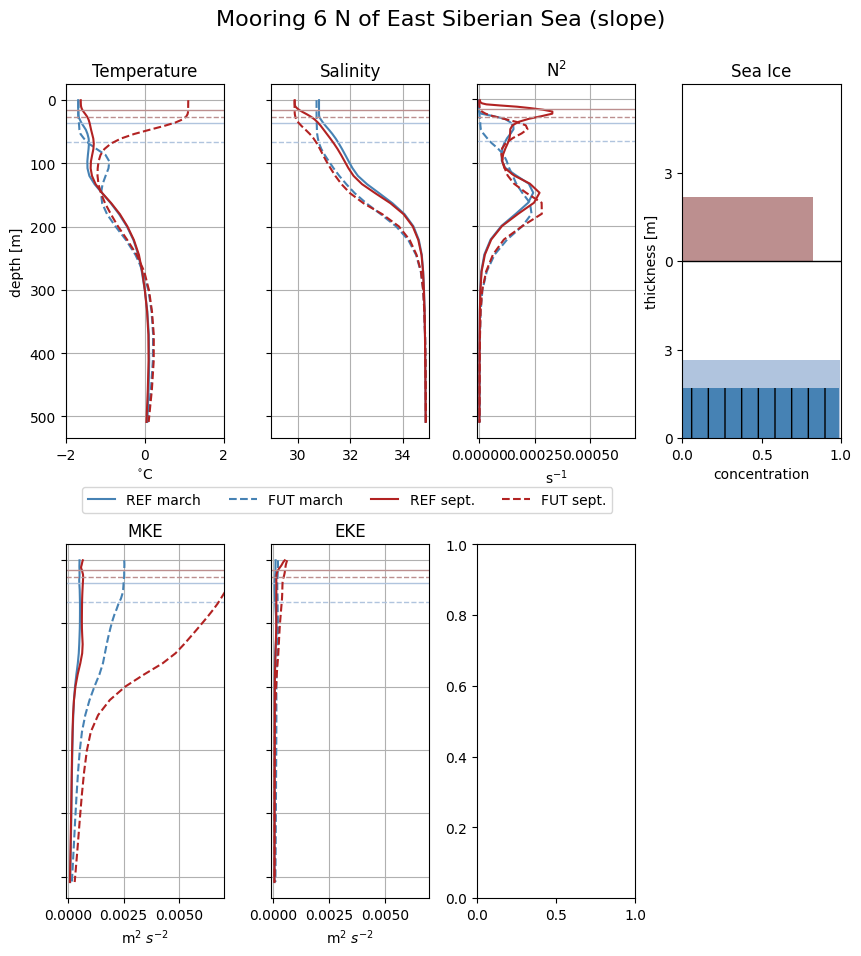

In [83]:
mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 7e-3, 7e-3]

moor = "moor6"
title = titles[5].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring006.png", dpi=300)

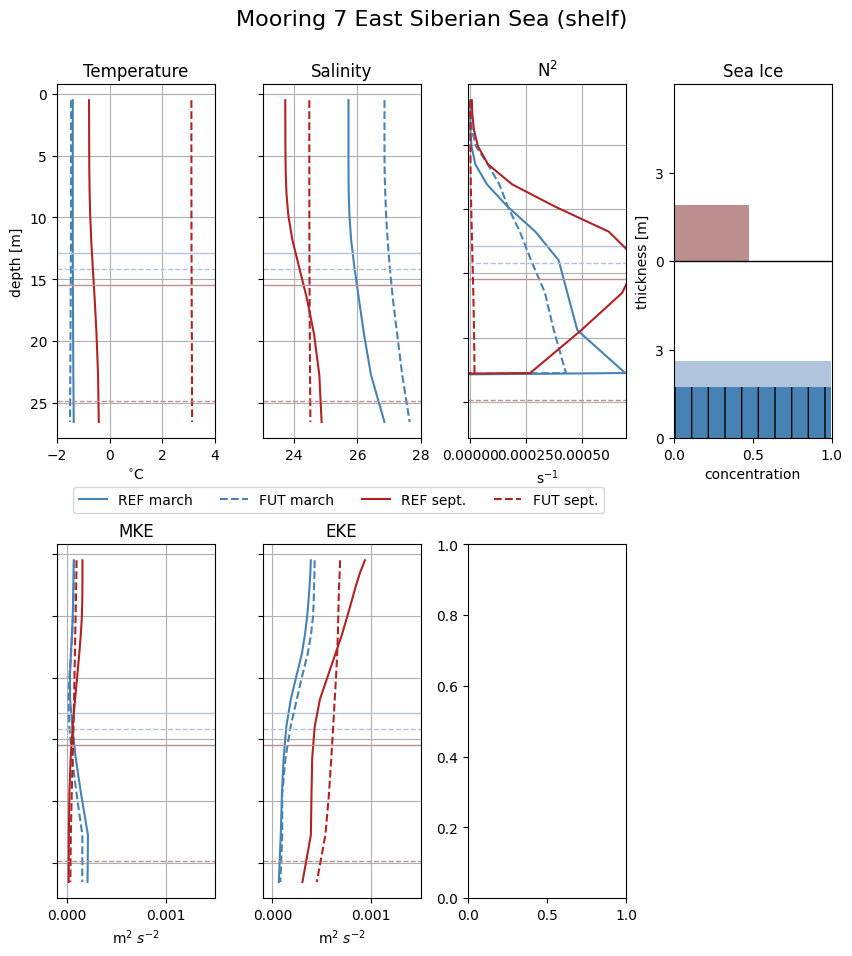

In [84]:
max_depth = 14

mins = [-2, 23, -1e-5, 0, -1e-4, -1e-4]
maxs = [4, 28, 7e-4, 1, 1.5e-3, 1.5e-3]

moor = "moor7"
title = titles[6].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring007.png", dpi=300)

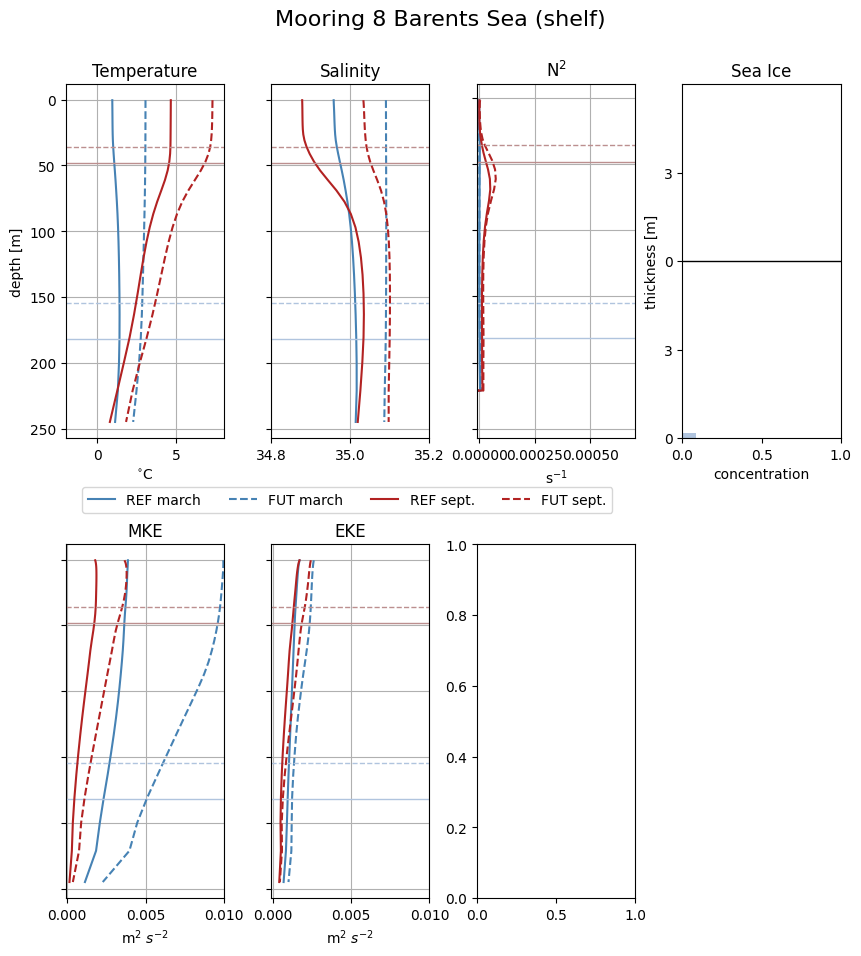

In [85]:
max_depth = 33

mins = [-2, 34.8, -1e-5, 0, -1e-4, -1e-4]
maxs = [8, 35.2, 7e-4, 1, 1e-2, 1e-2]

moor = "moor8"
title = titles[7].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring008.png", dpi=300)

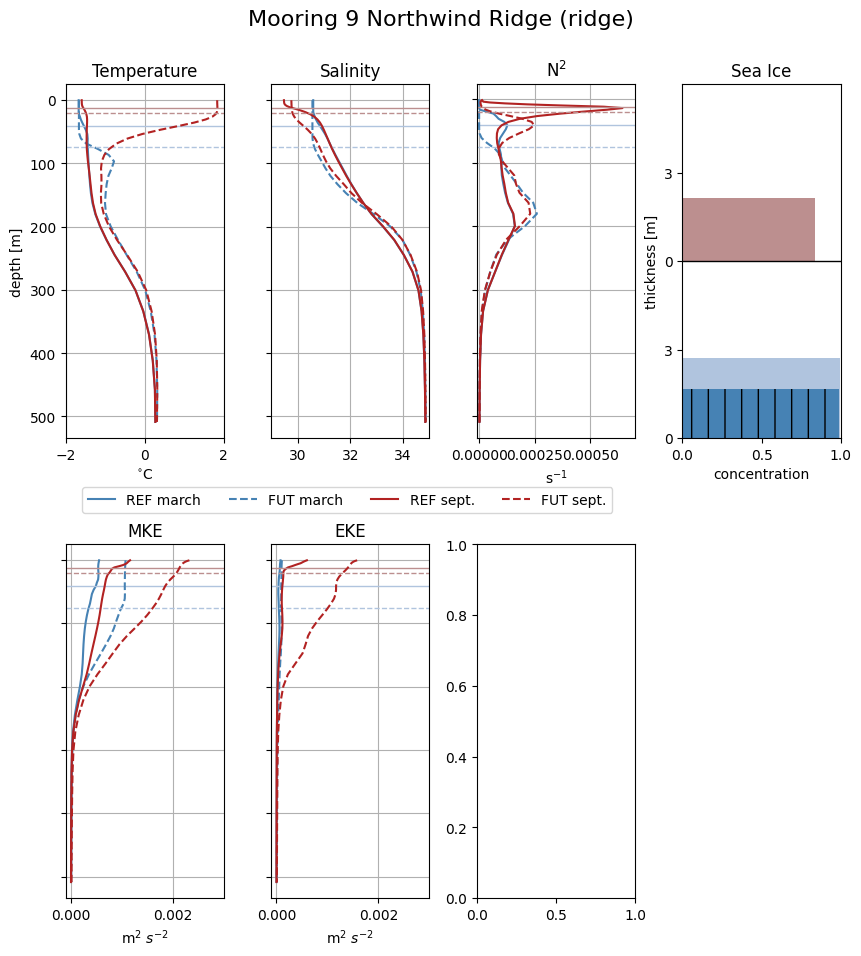

In [86]:
max_depth = 40

mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 3e-3, 3e-3]

moor = "moor9"
title = titles[8].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooring009.png", dpi=300)

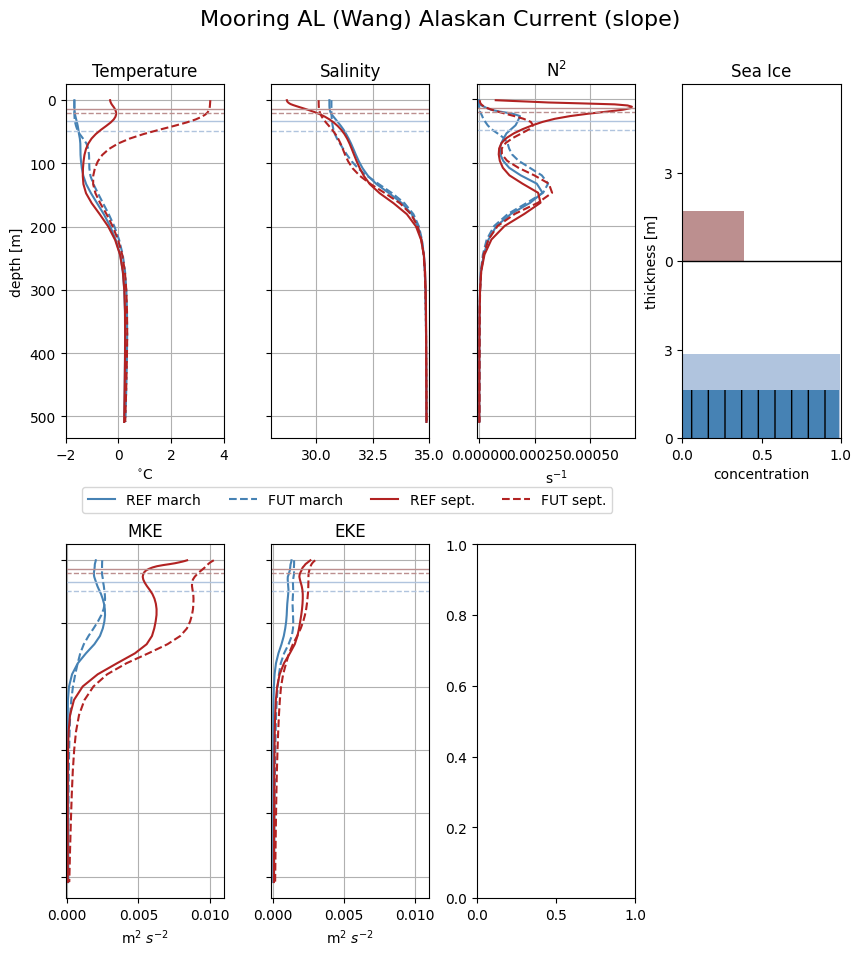

In [87]:
mins = [-2, 28, -1e-5, 0, -1e-4, -1e-4]
maxs = [4, 35, 7e-4, 1, 1.1e-2, 1.1e-2]

moor = "moor10"
title = titles[9].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooringWAL.png", dpi=300)

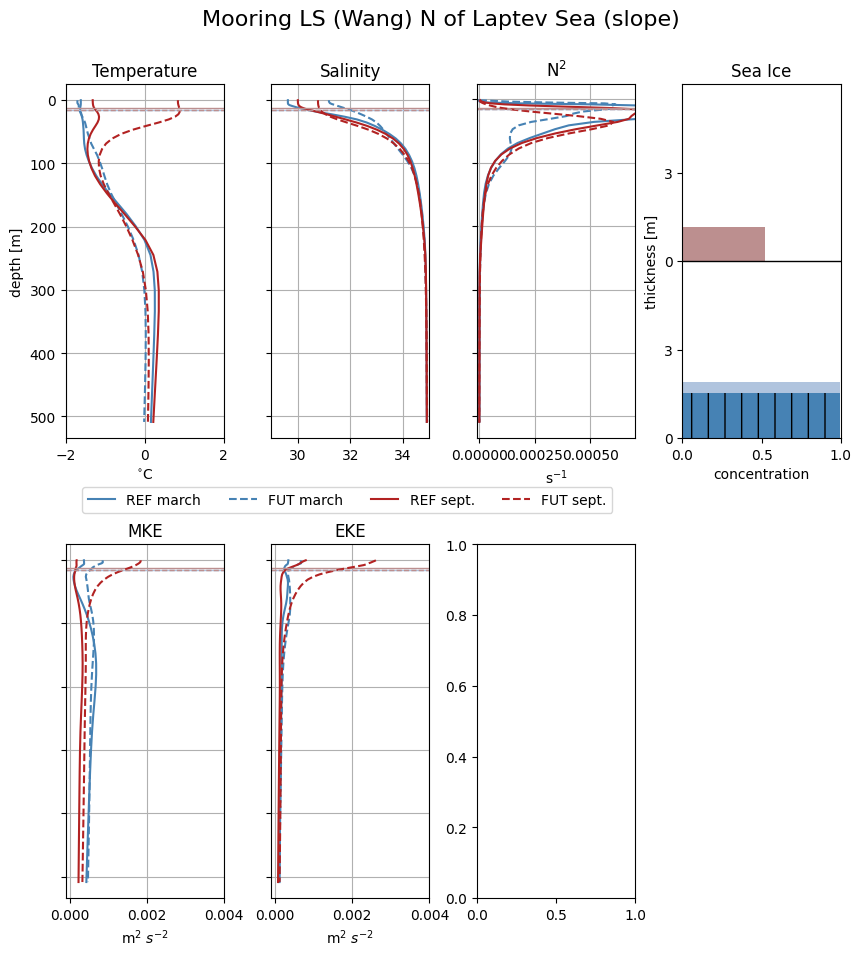

In [88]:
mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 4e-3, 4e-3]

moor = "moor11"
title = titles[10].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooringWLS.png", dpi=300)

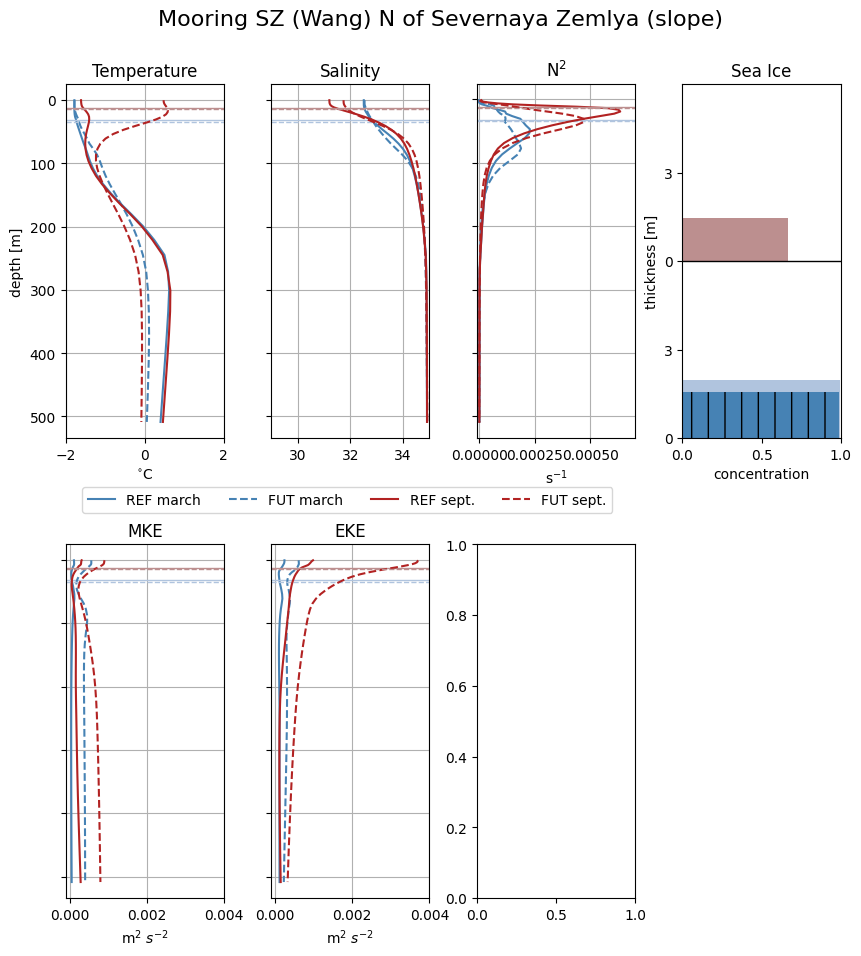

In [89]:
mins = [-2, 29, -1e-5, 0, -1e-4, -1e-4]
maxs = [2, 35, 7e-4, 1, 4e-3, 4e-3]

moor = "moor12"
title = titles[11].replace("\n", " ")

plot_panels(title, moor, var, mins, maxs, subtitles, cols, colsm, max_depth, months)

#plt.savefig("/home/jan/figures/LOPS/CREG12.L75_REF08_FUT08_mooringWSZ.png", dpi=300)